### Projeto analise de series temporais utilizando dados de vendas

Objetivo: prever vendas utilizando dados de vendas ocorridas no período de 2016-05-02 to 2022-03-29

    ##IMPORTACAO DOS DADOS
        Importar a tabela
    ##TRATAMENTO DOS DADOS
    ##ANALISE DOS DADOS
    ##CONSTRUCAO DOS GRAFICOS DE SERIES TEMPORAIS: 
        Tendencia, sazonalidade, etc e modelo.  

In [1]:
import pandas as pd

# Importar a tabela de dados

df = pd.read_excel(r"Forecasting_FInal_Sales.xlsx")
display(df)

,Invdate,Qty,total_sales,mean_date
0,2016-05-02,3,68206.80,22735.600000
1,2016-05-03,1,15961.90,15961.900000
2,2016-05-07,2,60523.40,30261.700000
3,2016-05-10,4,140950.95,35237.737500
4,2016-05-11,3,39251.12,13083.706667
...,...,...,...,...
1292,2022-03-22,6,217071.23,36178.538333
1293,2022-03-23,4,91889.25,22972.312500
1294,2022-03-25,4,78806.76,19701.690000
1295,2022-03-28,4,71239.56,17809.890000


In [2]:
# Deletar as colunas q nao necessarias p/ facilitar o trabalho/visualizacao ("5S dos dados")

new_tab = df.drop(["Qty", "mean_date"], axis = 1) 
display(new_tab)

,Invdate,total_sales
0,2016-05-02,68206.80
1,2016-05-03,15961.90
2,2016-05-07,60523.40
3,2016-05-10,140950.95
4,2016-05-11,39251.12
...,...,...
1292,2022-03-22,217071.23
1293,2022-03-23,91889.25
1294,2022-03-25,78806.76
1295,2022-03-28,71239.56


In [3]:
#Identificando o tipo de variavel pq isso ira influenciar na construcao das proximas analises

new_tab.info()

#Ambas as variaveis: Invdate e total_sales (vendas) sao do tipo datetime & float.
#De qq forma a coluna Invdate tera que ser transformada em indice (eixo x), o que requerera o trabalho a seguir.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invdate      1297 non-null   datetime64[ns]
 1   total_sales  1297 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.4 KB


In [4]:
#Transformar a coluna Invdate para ser o indice (eixo x). 

new_tab.set_index("Invdate")


,total_sales
Invdate,
2016-05-02,68206.80
2016-05-03,15961.90
2016-05-07,60523.40
2016-05-10,140950.95
2016-05-11,39251.12
...,...
2022-03-22,217071.23
2022-03-23,91889.25
2022-03-25,78806.76


In [5]:
#Apos rodar o codigo acima, a "coluna" Invidate esta em negrito mostrando q foi transformada em indice (n eh coluna +)
# inplace=True -> sera utilizado para alterar o objeto original mostrando isso. Importante p/ gerar o eixo x.

new_tab.set_index("Invdate", inplace=True)   ##executar e rodar o debaixo tb p/ ver a info.

In [6]:
# inplace mostrara agora como DatetimeIndex (Periodo:2016-05-02 to 2022-03-29) e antes era RangeIndex (acima).

new_tab.info() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1297 entries, 2016-05-02 to 2022-03-29
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_sales  1297 non-null   float64
dtypes: float64(1)
memory usage: 20.3 KB


In [7]:
#Calculando a estatistica descritiva
round(new_tab.describe())

,total_sales
count,1297.0
mean,108278.0
std,121399.0
min,2200.0
25%,34444.0
50%,73506.0
75%,139380.0
max,1131812.0


<AxesSubplot:xlabel='Invdate'>

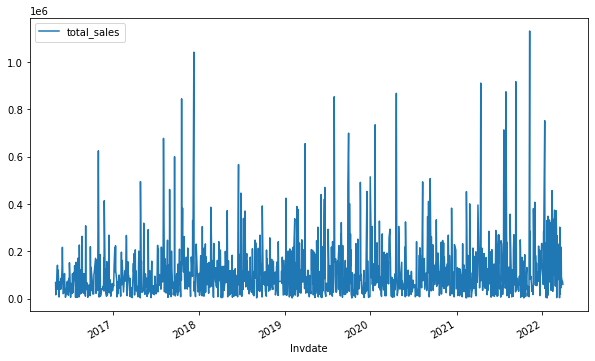

In [8]:
#Analisar o comportamento das vendas ao longo dos anos: 2016-2022
#As vendas variam de dia para dia e parecem nao apresentar um padrao de vendas.
#Existiram dias que as vendas foram bem maiores que em outros dias, como por exemplo no ano de 2018 e no ano de 2022. 
#No geral, parece que a pandemia nao afetou as vendas (2020 - inicio 2022).

new_tab.plot(figsize=(10,6))
#new_tab["total_sales"].plot(figsize=(10,6))


<AxesSubplot:xlabel='Invdate'>

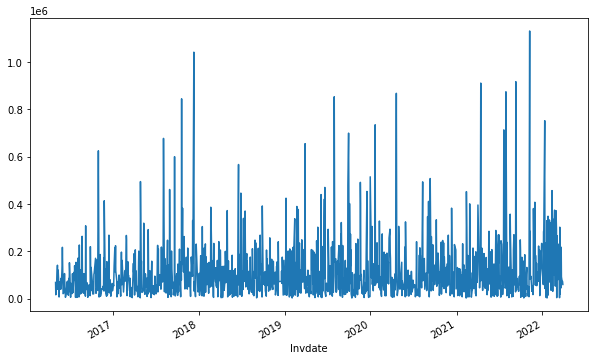

In [9]:
#Para analisar a componente de tendencia eh necessario eliminar o ruido (q pode estar associado ao ruido 
#aleatorio ou com a sazonalidade).

#Pelo grafico podemos perceber que a variabilidade ao longo dos anos ficou mais leve, mas o comportamento parece 
#sser o mesmo. Isso signigica dizer que houve dias que vendeu bem diferente de outro, as vendas sao aleatorias.

new_tab.total_sales.plot(figsize=(10,6))


In [10]:
#Para tentar ententer o comportamento da tendencia, tentaremos eliminar o ruido, um dos metodos eh calculando 
#a media movel. A tendencia esta asssociada com o comportamento de subida e descida.
#Eliminando o ruido das vendas atraves da tecnica de medias moveis baseado em 12 dias. Isso significa que a partir
#da 12a posicao eh que sera possivel calcular a media movel. Aqui sempre preciso do valor atual mais os 11 primeiros


# O comportamento nao muda muito, mas fica mais suave.

#round(new_tab.total_sales.rolling(12).mean())
round(new_tab.total_sales.rolling(12).mean().head(12)) #= (64075 mostrado dia 2016-05-20 eh a media dos 11 anteriores)

Invdate
2016-05-02        NaN
2016-05-03        NaN
2016-05-07        NaN
2016-05-10        NaN
2016-05-11        NaN
2016-05-12        NaN
2016-05-13        NaN
2016-05-16        NaN
2016-05-17        NaN
2016-05-18        NaN
2016-05-19        NaN
2016-05-20    64075.0
Name: total_sales, dtype: float64

In [11]:
#Fins didaticos: para encontrar o valor do primeiro dia 2016-05-02 precisei calcular a media dos anteriores

round(new_tab.total_sales.rolling(12).mean().head(13))

Invdate
2016-05-02        NaN
2016-05-03        NaN
2016-05-07        NaN
2016-05-10        NaN
2016-05-11        NaN
2016-05-12        NaN
2016-05-13        NaN
2016-05-16        NaN
2016-05-17        NaN
2016-05-18        NaN
2016-05-19        NaN
2016-05-20    64075.0
2016-05-24    61641.0
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='Invdate'>

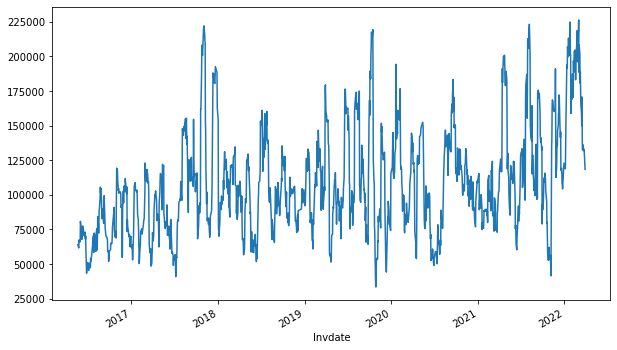

In [12]:
#Plotar o grafico para verificar o comportamento das vendas sem o ruido. Por esse grafico ja se percebe uma tendencia
#leve de crescimento aos longos dos anos, e apesar da variabilidade mais acentuado no meados 2021/inicio 2022, 
#nota-se uma tendencia de crescimento. 

new_tab.total_sales.rolling(12).mean().plot(figsize=(10,6))

In [13]:
#Analisando a sazonalidade. Ja nesse caso, temos que eliminar a tendencia aplicando diferencas sucessivas
#(tentar balancear as vendas para compensar um valor alto de baixo). Serie centrada na media 0 (estacioanria).

new_tab.total_sales.diff()

Invdate
2016-05-02          NaN
2016-05-03    -52244.90
2016-05-07     44561.50
2016-05-10     80427.55
2016-05-11   -101699.83
                ...    
2022-03-22    172310.36
2022-03-23   -125181.98
2022-03-25    -13082.49
2022-03-28     -7567.20
2022-03-29    -11660.65
Name: total_sales, Length: 1297, dtype: float64

<AxesSubplot:xlabel='Invdate'>

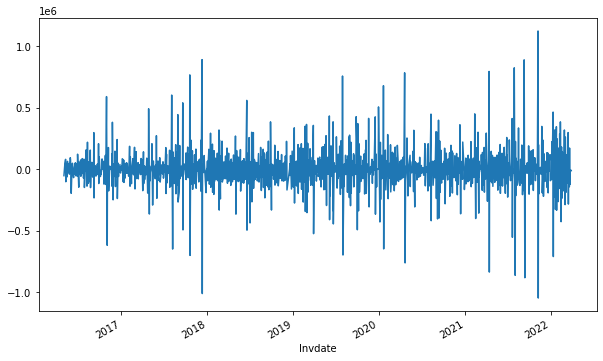

In [14]:
#Plotando o grafico sem a tendencia p/ ver a sazonalidade

new_tab.total_sales.diff().plot(figsize=(10,6))

<AxesSubplot:xlabel='Invdate'>

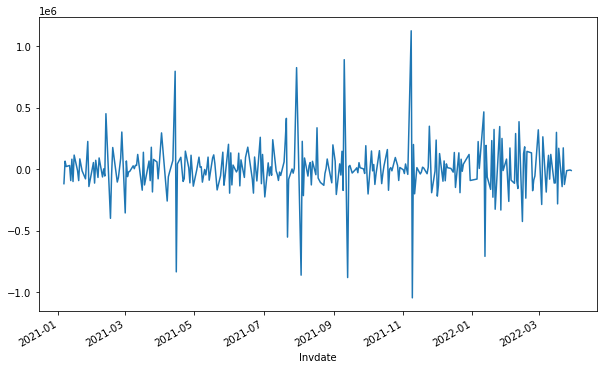

In [15]:
#Como a serie eh muito grande, analisarei um periodo menor (Periodo total:2019-12-31 to 2022-03-29)

#Pelo grafico apesar de alguns meses alguns meses (por ex: final abril, entre set. e nov/2021) apresentarem picos 
#de vendas (a maior e a menor), a variabilidade/ comportamento de vendas de um dia p/ outro esta dentro de uma faixa 
#"normal" de vendas. De fato n parece existir sazonalidade.

filtro = (new_tab.index.year >= 2021) & (new_tab.index.year <= 2022)

new_tab[filtro].total_sales.diff().plot(figsize=(10,6))